In [38]:
import numpy as np
import matplotlib.pylab as plt

In [39]:
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset

In [40]:
g = RegularGridDataset(
    data.get_demo_path("nrt_global_allsat_phy_l4_20190223_20190226.nc"),
    "longitude",
    "latitude",
    )

We assume pixel position of grid is center for /home/mballarotta/.conda/envs/eddy_report/lib/python3.7/site-packages/py_eddy_tracker/data/nrt_global_allsat_phy_l4_20190223_20190226.nc


### Compute ugeo & vgeo with finite difference

In [41]:
g.add_uv("adt", stencil_halfwidth=1)

### Compute divergence with finite difference

In [42]:
# du/dx
u_x = g.compute_stencil(g.grid("u"), stencil_halfwidth=1, mode = "wrap")
# dv/dy
v_y = g.compute_stencil(g.grid("v"), stencil_halfwidth=1, vertical=True, mode = "wrap")

### Compute divergence with stencil 9 points

In [43]:
# du/dx
u_x2 = g.compute_stencil(g.grid("u"), stencil_halfwidth=4, mode = "wrap")
# dv/dy
v_y2 = g.compute_stencil(g.grid("v"), stencil_halfwidth=4, vertical=True, mode = "wrap")

### Plot divergences with finnite difference

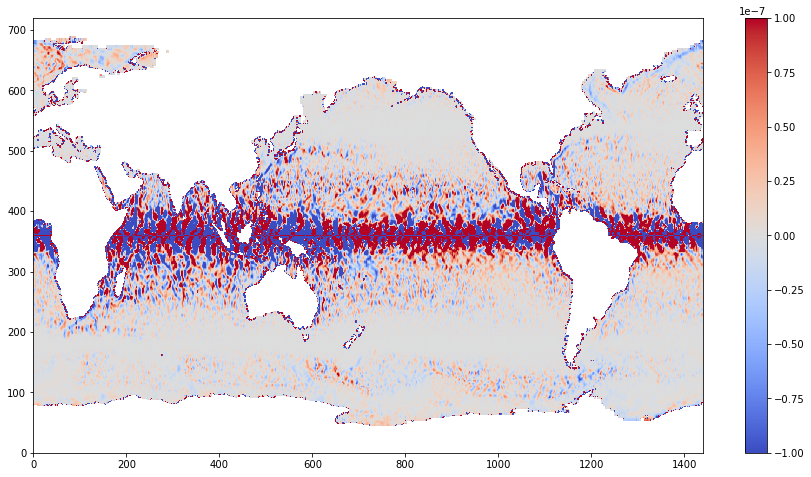

In [44]:
plt.figure(figsize=(15, 8))
plt.pcolormesh(u_x.T + v_y.T, vmin=-0.0000001,vmax=0.0000001, cmap='coolwarm')
plt.colorbar()

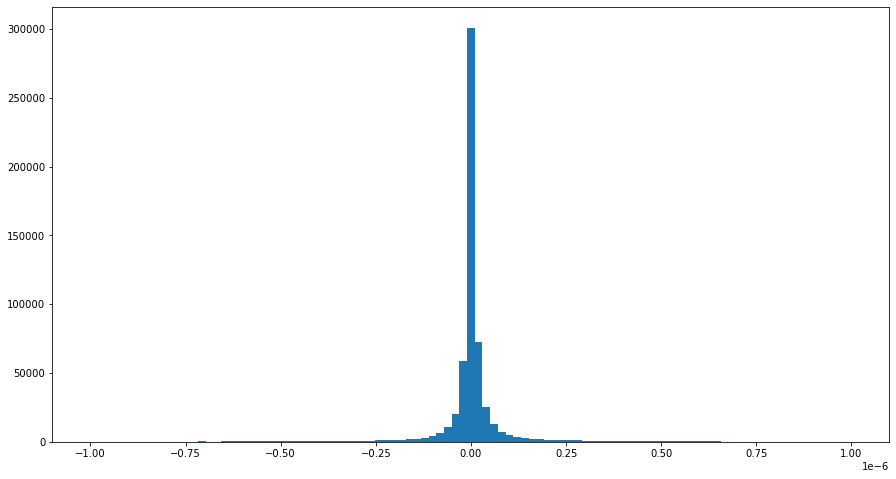

In [45]:
plt.figure(figsize=(15, 8))
_ = plt.hist((u_x.T + v_y.T).flatten(), bins=np.linspace(-0.000001, 0.000001, 100))

### Plot divergences with stendcil 9 points

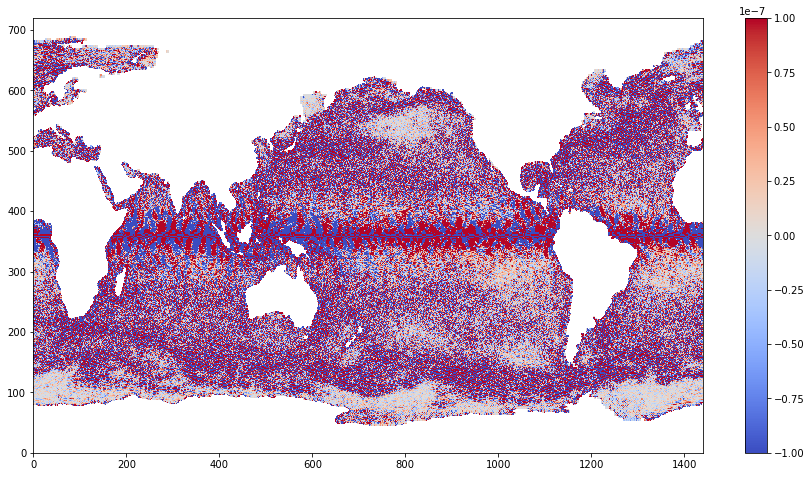

In [46]:
plt.figure(figsize=(15, 8))
plt.pcolormesh(u_x2.T + v_y2.T, vmin=-0.0000001,vmax=0.0000001, cmap='coolwarm')
plt.colorbar()

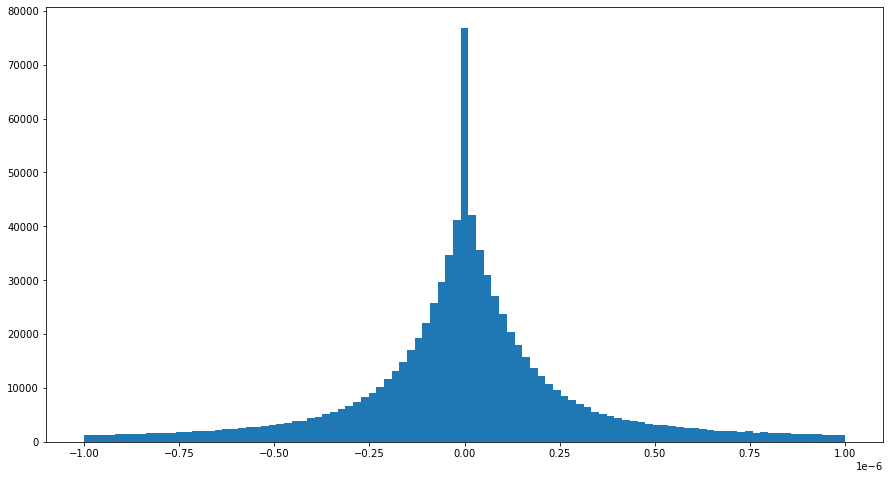

In [47]:
plt.figure(figsize=(15, 8))
_ = plt.hist((u_x2.T + v_y2.T).flatten(), bins=np.linspace(-0.000001, 0.000001, 100))